In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def k_distance(points_number: int) -> np.ndarray:
    return np.linspace(0, 1, points_number + 1)

def x_distance(points_number: int) -> np.ndarray:
    distance = k_distance(points_number)
    return np.array([-5 + point*10/max(distance) for point in distance])

def y_distance(points_number: int) -> np.ndarray:
    x_k: np.ndarray = x_distance(points_number)
    return np.array([1/(1+point**2) for point in x_k])

In [44]:
def find_interp_coefs(points_number: int) -> np.ndarray:
    x_k: np.ndarray = x_distance(points_number)
    y_k: np.ndarray = y_distance(points_number)
    coefficients: np.ndarray = y_k.copy()
    for i in range(1, len(x_k)):
        for j in range(len(x_k) - 1, i - 1, -1):
            coefficients[j] = (coefficients[j] - coefficients[j - 1]) / (x_k[j] - x_k[j - i])
    return coefficients

def interpolate(points_number: int, x: float) -> np.ndarray:
    x_k: np.ndarray = x_distance(points_number)
    coefs: np.ndarray = find_interp_coefs(points_number)
    mult: float = 1.0
    mult_x: list = [1.0]
    for i in range(len(x_k)-1):
        mult = mult*(x - x_k[i])
        mult_x.append(mult)
    p_x: np.ndarray = np.dot(np.array(mult_x), np.array(coefs))
    return p_x

In [45]:
# x_values: list = [x_distance(i) for i in range(4, 29)]
# y_values: list = []
# for k in range(4, 29):
#     y = [interpolate(k, x) for x in x_distance(k)]
#     y_values.append(y)
# len(y_values[1]), len(x_values[-1]), len(y_distance(29))
x_values = x_distance(100)
y_values = [interpolate(100, x) for x in x_distance(100)]

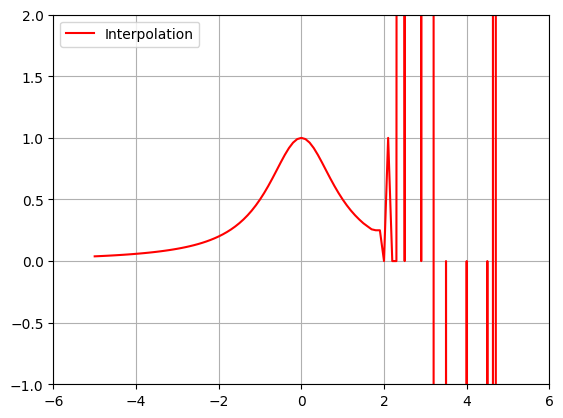

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
plt.grid(True)
plt.xlim(-6, 6)
plt.ylim(-1, 2)
line_1 = plt.plot(x_values, y_values, c = 'red', label = 'Interpolation')
# line_2 = ax.scatter(x_distance(4), y_distance(4))
# line_2.set_label('Calculation')
plt.legend()
ax.legend()

plt.show()

ValueError: x and y must be the same size

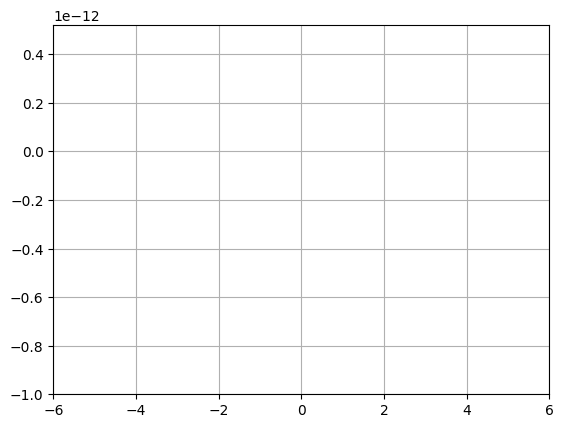

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
plt.grid(True)
plt.xlim(-6, 6)
plt.ylim(-1.0e-12, 5.21804822e-13)

line_1 = ax.scatter(x_values[-1], y_values[-1] - y_distance(28), c = 'red', label = 'error')
print(y_values[-1] - y_distance(28))
ax.legend()
plt.show()